In [23]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [24]:
selected_cell = 'Central_venous_LSECs'

In [25]:
estimation = pd.read_csv('GSE14520.Non-immune.csv',index_col=0)
estimation.head()

Central_venous_LSECs  Cholangiocytes     Other  Hepatocyte  \
Mixture                                                                 
GSM362947              0.000000        0.000000  0.000000    0.786213   
GSM362948              0.000000        0.013586  0.008070    0.738363   
GSM362949              0.000789        0.165160  0.002597    0.630557   
GSM362950              0.000000        0.070003  0.000000    0.699390   
GSM362951              0.015375        0.000000  0.000000    0.864187   

           Portal_endothelial_Cells  Periportal_LSECs  Hepatic_Stellate_Cells  \
Mixture                                                                         
GSM362947                  0.000000          0.156330                0.057457   
GSM362948                  0.000000          0.120641                0.119340   
GSM362949                  0.000000          0.102107                0.098789   
GSM362950                  0.009998          0.119839                0.100770   
GSM362951                  0.000000          0.082593                0.037143   

           Erythroid_Cells  P-value  Correlation      RMSE  
Mixture                                                     
GSM362947         0.000000        0     0.799634  0.837335  
GSM362948         0.000000        0     0.772421  0.849952  
GSM362949         0.000000        0     0.813672  0.840666  
GSM362950         0.000000        0     0.827382  0.836795  
GSM362951         0.000701        0     0.813160  0.820451

In [26]:
survival_data = pd.read_csv('GSE14520.Survival.csv',index_col=0)
survival_data.head()

OS_E    OS  DFS_E   DFS
GSM                               
GSM363205     0  58.0      0  58.0
GSM363115     0  66.6      0  66.6
GSM362970     0  67.3      0  67.3
GSM363354     1  10.4      1  10.4
GSM363039     0  52.8      0  52.8

In [27]:
dfs_data = survival_data.filter(['DFS_E', 'DFS'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFS_E']]
dfs_data['DFS_T'] = [time for time in dfs_data['DFS']]
dfs_data.head()

DFS_E   DFS  DFS_T
GSM                          
GSM363205  False  58.0   58.0
GSM363115  False  66.6   66.6
GSM362970  False  67.3   67.3
GSM363354   True  10.4   10.4
GSM363039  False  52.8   52.8

In [28]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

Central_venous_LSECs  Cholangiocytes     Other  Hepatocyte  \
GSM362947              0.000000        0.000000  0.000000    0.786213   
GSM362948              0.000000        0.013586  0.008070    0.738363   
GSM362949              0.000789        0.165160  0.002597    0.630557   
GSM362950              0.000000        0.070003  0.000000    0.699390   
GSM362952              0.004970        0.000000  0.000000    0.866759   

           Portal_endothelial_Cells  Periportal_LSECs  Hepatic_Stellate_Cells  \
GSM362947                  0.000000          0.156330                0.057457   
GSM362948                  0.000000          0.120641                0.119340   
GSM362949                  0.000000          0.102107                0.098789   
GSM362950                  0.009998          0.119839                0.100770   
GSM362952                  0.000000          0.087406                0.040865   

           Erythroid_Cells  P-value  Correlation      RMSE  DFS_E   DFS  DFS_T  
GSM362947              0.0        0     0.799634  0.837335   True  50.0   50.0  
GSM362948              0.0        0     0.772421  0.849952   True   8.8    8.8  
GSM362949              0.0        0     0.813672  0.840666   True  18.2   18.2  
GSM362950              0.0        0     0.827382  0.836795   True  30.1   30.1  
GSM362952              0.0        0     0.853724  0.808221  False  54.3   54.3

In [29]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

Central_venous_LSECs  Cholangiocytes     Other  Hepatocyte  \
GSM363143              0.069330        0.217804  0.104234    0.301213   
GSM363188              0.018817        0.000000  0.001099    0.777821   
GSM363243              0.018730        0.000000  0.009714    0.900396   
GSM363176              0.015703        0.000000  0.005621    0.831906   
GSM363335              0.015251        0.000000  0.000000    0.828952   

           Portal_endothelial_Cells  Periportal_LSECs  Hepatic_Stellate_Cells  \
GSM363143                   0.00000          0.104194                0.203225   
GSM363188                   0.00000          0.101545                0.100718   
GSM363243                   0.00000          0.032666                0.038494   
GSM363176                   0.00000          0.070825                0.075928   
GSM363335                   0.02481          0.065235                0.065753   

           Erythroid_Cells  P-value  Correlation      RMSE  DFS_E   DFS  DFS_T  
GSM363143         0.000000        0     0.009657  1.008272   True  32.6   32.6  
GSM363188         0.000000        0     0.821099  0.832970   True  46.3   46.3  
GSM363243         0.000000        0     0.875269  0.795412  False  55.8   55.8  
GSM363176         0.000019        0     0.807347  0.827443  False  50.7   50.7  
GSM363335         0.000000        0     0.872488  0.810144  False  59.4   59.4

In [30]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [31]:
#optimization = optimization.dropna()
#optimization = optimization.sort_values('Log Rank Test')
#optimization = int(optimization.iloc[0].name)
optimization = int(len(E)/2)

In [32]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.00261314198583037

In [33]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.65746

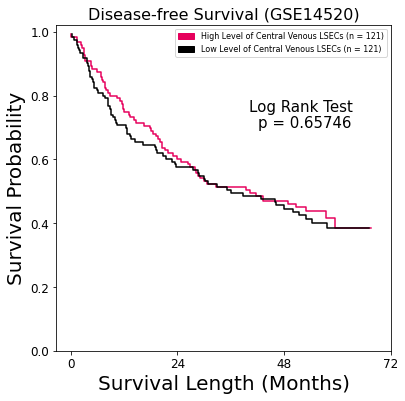

In [34]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,73,24),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of Central Venous LSECs (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Central Venous LSECs (n = %s)'%len(E_low))
plt.text(40,0.75, 'Log Rank Test',fontsize=15)
plt.text(42,0.7, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=8)
plt.title('Disease-free Survival (GSE14520)',fontsize=16)
plt.savefig('GSE14520.%s.DFS.pdf'%selected_cell,format='pdf')

In [35]:
os_data = survival_data.filter(['OS_E', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS_E']]
os_data['OS_T'] = [time for time in os_data['OS']]
os_data.head()

OS_E    OS  OS_T
GSM                         
GSM363205  False  58.0  58.0
GSM363115  False  66.6  66.6
GSM362970  False  67.3  67.3
GSM363354   True  10.4  10.4
GSM363039  False  52.8  52.8

In [36]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

Central_venous_LSECs  Cholangiocytes     Other  Hepatocyte  \
GSM362947              0.000000        0.000000  0.000000    0.786213   
GSM362948              0.000000        0.013586  0.008070    0.738363   
GSM362949              0.000789        0.165160  0.002597    0.630557   
GSM362950              0.000000        0.070003  0.000000    0.699390   
GSM362952              0.004970        0.000000  0.000000    0.866759   

           Portal_endothelial_Cells  Periportal_LSECs  Hepatic_Stellate_Cells  \
GSM362947                  0.000000          0.156330                0.057457   
GSM362948                  0.000000          0.120641                0.119340   
GSM362949                  0.000000          0.102107                0.098789   
GSM362950                  0.009998          0.119839                0.100770   
GSM362952                  0.000000          0.087406                0.040865   

           Erythroid_Cells  P-value  Correlation      RMSE   OS_E    OS  OS_T  
GSM362947              0.0        0     0.799634  0.837335   True  59.2  59.2  
GSM362948              0.0        0     0.772421  0.849952  False  61.4  61.4  
GSM362949              0.0        0     0.813672  0.840666   True  18.2  18.2  
GSM362950              0.0        0     0.827382  0.836795  False  57.5  57.5  
GSM362952              0.0        0     0.853724  0.808221  False  54.3  54.3

In [37]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

Central_venous_LSECs  Cholangiocytes     Other  Hepatocyte  \
GSM363143              0.069330        0.217804  0.104234    0.301213   
GSM363188              0.018817        0.000000  0.001099    0.777821   
GSM363243              0.018730        0.000000  0.009714    0.900396   
GSM363176              0.015703        0.000000  0.005621    0.831906   
GSM363335              0.015251        0.000000  0.000000    0.828952   
...                         ...             ...       ...         ...   
GSM363310              0.000000        0.066841  0.012739    0.666311   
GSM363038              0.000000        0.015522  0.000000    0.856291   
GSM363298              0.000000        0.125598  0.130535    0.504742   
GSM363050              0.000000        0.041250  0.000000    0.749084   
GSM362947              0.000000        0.000000  0.000000    0.786213   

           Portal_endothelial_Cells  Periportal_LSECs  Hepatic_Stellate_Cells  \
GSM363143                   0.00000          0.104194                0.203225   
GSM363188                   0.00000          0.101545                0.100718   
GSM363243                   0.00000          0.032666                0.038494   
GSM363176                   0.00000          0.070825                0.075928   
GSM363335                   0.02481          0.065235                0.065753   
...                             ...               ...                     ...   
GSM363310                   0.00000          0.133122                0.120986   
GSM363038                   0.00000          0.080238                0.047907   
GSM363298                   0.00000          0.129483                0.109642   
GSM363050                   0.00000          0.091372                0.118294   
GSM362947                   0.00000          0.156330                0.057457   

           Erythroid_Cells  P-value  Correlation      RMSE   OS_E    OS  OS_T  
GSM363143         0.000000        0     0.009657  1.008272   True  32.6  32.6  
GSM363188         0.000000        0     0.821099  0.832970  False  57.3  57.3  
GSM363243         0.000000        0     0.875269  0.795412  False  55.8  55.8  
GSM363176         0.000019        0     0.807347  0.827443  False  50.7  50.7  
GSM363335         0.000000        0     0.872488  0.810144  False  59.4  59.4  
...                    ...      ...          ...       ...    ...   ...   ...  
GSM363310         0.000000        0     0.915894  0.821730   True  23.5  23.5  
GSM363038         0.000042        0     0.861193  0.805963   True  15.1  15.1  
GSM363298         0.000000        0     0.878021  0.855514  False  53.6  53.6  
GSM363050         0.000000        0     0.914621  0.808343  False  54.2  54.2  
GSM362947         0.000000        0     0.799634  0.837335   True  59.2  59.2  

[242 rows x 14 columns]

In [38]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [39]:
#optimization = optimization.dropna()
#optimization = optimization.sort_values('Log Rank Test')
#optimization = int(optimization.iloc[0].name)
optimization = int(len(E)/2)

In [40]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.00261314198583037

In [41]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.43307

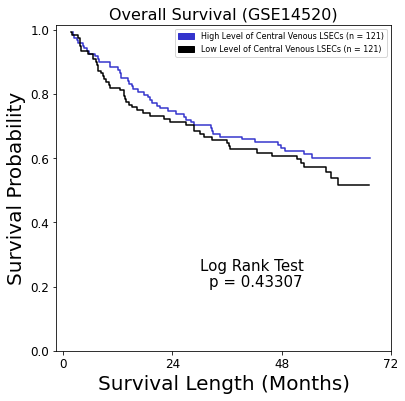

In [42]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,73,24),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of Central Venous LSECs (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Central Venous LSECs (n = %s)'%len(E_low))
plt.text(30,0.25, 'Log Rank Test',fontsize=15)
plt.text(32,0.2, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=8)
plt.title('Overall Survival (GSE14520)',fontsize=16)
plt.savefig('GSE14520.%s.OS.pdf'%selected_cell,format='pdf')

In [43]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

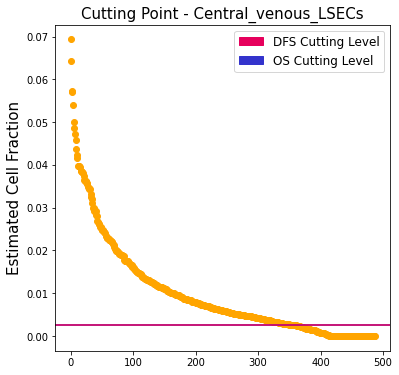

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.title('Cutting Point - %s'%selected_cell,fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')